<a href="https://colab.research.google.com/github/sejhig2/mask-detection/blob/master/test_gun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 준비하기

## 1.1 데이터 준비하기



### 1.1.1 데이터셋 다운 받기
roboflow

https://public.roboflow.com/

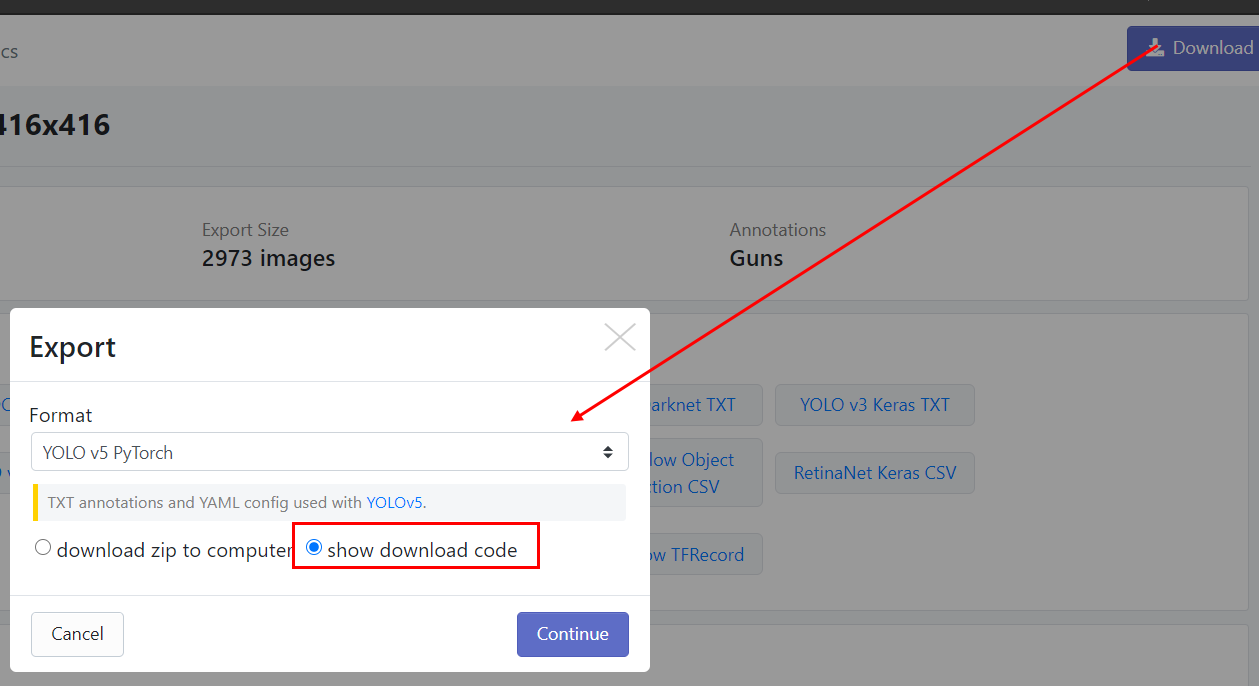


### 코드로 가져온 데이터셋을 코랩으로 불러오기
옵션 3가지 중에jupyternotebook에 맞게 가져온다.

In [ ]:
!curl -L "https://public.roboflow.com/ds/JhqXMwCJ88?key=lK30O5Brxr" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

코랩의 왼쪽 트리를 보면 export 안에 이미지와 레이블이 들어온 것을 확인할 수 있다.

###1.2 yolo 설치
1. 디렉토리를 바꿔줄 것이다 (현재 폴더에서 yolo를 사용해줄 것이기 때문에)
2. github에서 clone 해서 받을 것이다( !git clone 깃허브주소 )

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

3. yolo 디렉토리로 이동 후 yolo 설치하기

In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

### 1.3 데이터셋 전처리
1. data.yaml 이 무엇인지 확인

    train 경로와, 검증(val) 경로, 클래스(총이라는 것)을 알 수 있다.

In [ ]:
%cat /content/dataset/data.yaml

2. 이미지를 모두 가져오고 장 수를 확인한다.

In [ ]:
%cd /

# 모든 이미지를 가져온다.
from glob import glob
img_list = glob("/content/dataset/export/images/*.jpg")

print("가져온 이미지의 총 수 : ",len(img_list))

3. 훈련 데이터가 나눠져 있지 않다. 훈련데이터 -> 훈련, 검증 데이터로 나누자

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split( img_list, test_size = 0.2 , random_state=2000 )

print("훈련 데이터의 수 : ",len(train_img_list),"검증 데이터의 수 :",len(val_img_list) )

4. 트레이닝 이미지 경로, 검증(validation) 이미지 경로를 txt파일로 저장해두자

In [ ]:
with open('/content/dataset/train.txt','w') as f:
    f.write('\n'.join(train_img_list)+'\n')
with open('/content/dataset/val.txt','w') as f:
    f.write('\n'.join(val_img_list) +'\n')

2. 

### 1.4 yaml 파일 수정하기
- yaml 패키지 import
- data.yaml 읽어오기

In [ ]:
import yaml

with open("/content/dataset/data.yaml", 'r') as f :
    data = yaml.load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open("/content/dataset/data.yaml", 'w') as f :
    yaml.dump(data, f )

print(data)

- 경로가 바뀌었다.
원래 : 'train': '../train/images'

- 바꾼 후 : 'train': '/content/dataset/train.txt'

# 훈련하기
- 자세한 사항은 yolo github에서  
https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
- 5. train 절에서 자세한 점 확인

https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [ ]:
%cd /content/yolov5/
!python train.py